In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

penguins = sns.load_dataset("penguins")
titanic = sns.load_dataset("titanic")

In [8]:
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col = "ResponseId")

survey_results_chema.csv에서 우리가 필요한 정보는 column에 해당하는 qname과 그에 상응하는

In [11]:
schema_raw = pd.read_csv('data/survey_results_schema.csv', index_col="qname")["question"]

데이터의 column명과 schema으 index가 정확히 일치하지는 않아도 어느 정도 파악이 가능할 것으로 보입니다.

In [15]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [14]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

데이터의 컬럼 중 CompTotal이란 항목에 대한 질문이 궁금하다면 schema_raw 시리즈 데이터를 통해 아래와 같이 조회해보면 됩니다.

In [17]:
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [18]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

survey_raw_df에 대한 info()를 조회해보면 총 78개의 column이 존재한다.
수많은 column이 존재한다면 pandas에서 가시성을 위해 출력시 column 일부를 생략합니다.

In [20]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

survey_raw_df에 대해 조회할 때 생략되는 column이 없도록 아래와 같이 설정을 해줍니다.
- display.max_columns: 표현되는 column의 최대 개수
- display.max_rows: 표현되는 row의 최대 개수

In [ ]:
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)

매우 많은 column이 존재하는데, 이 중 우리는 일부를 발췌하여 사용
- 인구 통계(성별, 나이, 학력 등)
- 프로그래밍 기술, 경험 및 선호도
- 고용 관련 정보, 선호도 및 의견

In [27]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel', # 학력
    # 프로그래밍 경험
    'YearsCode', # 코딩 경험
    'YearsCodePro', # 코딩 경력
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

위에서 만든 리스트를 활용하여 column에 대해 배열 인덱싱을 하고 있습니다. 이로 인해 얻어진 결과를 survey_raw_df로부터 분리하여 작업하고자 copy() 메서드를 통해 새롭게 복사했습니다.

In [29]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [30]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

In [32]:
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


value_counts()를 활용해서 어떤 값의 유형을 갖는지 직접 확인해봅시다.
조회해보니 연을 포함하는 수치값과 'less tan 1 year'라는 문자열과 'more than 50 years'라는 문자열이 보입니다.

저 두 문자열이 포함되어 있어 csv 파일을 읽어들일 떄 수치형 데이터로 표현이 어려웠던 것 같네요.

In [33]:
survey_df["YearsCode"].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

연습 문제: 작업에 들어가기 이전에 해당 column(series)이 NaN 값을 얼마나 갖는지 확인하기 위한 함수를 만들어 봅시다.
- series를 인자로 갖는 count_nan 함수를 만듭니다.
- 이 함수는 인자로 전달된 series의 NaN 개수를 반환해줍니다.

In [45]:
def count_nan_1(series):
    return series.isnull().sum()

In [46]:
def count_nan(series):
    return len(series) - series.count()

In [48]:
count_nan(survey_df["YearsCode"])

1937

In [37]:
survey_df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: EdLevel, dtype: int64

연습문제: YearsCode의 'less than 1 year'의 값은 0으로 변경하고 'More than 50 years'의 값은 51로 일괄적으로 변경하려 합니다.
또 dtype을 float로 변경하고 이를 survey_df["YearsCode"]에 적용해보세요.
- 아래의 Series의 메서드를 활용해보세요.
- 힌트: replace(변경 전 값, 변경 후 값, inplace=True)

In [69]:
survey_df.YearsCode.replace('Less than 1 year', 0, inplace=True)
# survey_df["yearsCode"].replace('Less than 1 year', 0, inplace=True)

In [70]:
survey_df.YearsCode.replace('More than 50 years', 51, inplace=True)

In [71]:
survey_df = survey_df.astype({'YearsCode':'float64'})
# survey_df["YearsCode"] = survey_df["yearsCode"].astype(float)

In [72]:
survey_df["YearsCode"]

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float64

In [73]:
print(survey_df["YearsCode"].dtype)

float64


교육기관을 포함하지 않는 column YearsCodePro
YearsCode보다 결측치가 많아 보인다.

In [77]:
print(schema_raw["YearsCodePro"])

NOT including education, how many years have you coded professionally (as a part of your work)?


In [78]:
count_nan(survey_df["YearsCodePro"])

21435

In [79]:
survey_df["YearsCodePro"].value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [81]:
survey_df["YearsCodePro"].replace("Less than 1 year", 0, inplace=True)
survey_df["YearsCodePro"].replace("More than 50 years", 51, inplace=True)
survey_df["YearsCodePro"] = survey_df["YearsCodePro"].astype(float)

In [82]:
survey_df["YearsCodePro"]

ResponseId
1         NaN
2         NaN
3         5.0
4        17.0
5         3.0
         ... 
73264     5.0
73265     5.0
73266    33.0
73267    31.0
73268     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

column 들에 대한 통계 요약을 확인할 수 있다. describe()를 통해 값의 분포를 확인. 범위마다 표현되는 값이 정수이다 보니 데이터 값이 정수 값을 갖는 것을 짐작해볼 수 있다.

In [85]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


만약 YearsCode, YearscDoePro에 대한 값 중 "less than 1 year", "More than 50 years"의 값을 NaN으로 처리하면서 수치 자료형으로 바꾼다면 아래 보이는 것처럼 to_numeric() 메서드를 사용할 수도 있습니다.

In [87]:
survey_df["YearsCode"] = pd.to_numeric(survey_df.YearsCode, errors="coerce")
survey_df["YearsCodePro"] = pd.to_numeric(survey_df.YearsCodePro, errors="coerce")

Gender, 성별에 대한 column입니다. 여러가지 옵션을 선택할 수 있또록 되어있는 항목입니다. 그 값들의 유니크한 목록을 뽑아보면 예상 외로 다양한 값이 존재할 수 있습니다. 여기서는 둘 이상의 옵션이 포함된 값을 배제하고 데이터를 다루겠습니다.

In [88]:
schema_raw["Gender"]

'Which of the following describe you, if any? Please check all that apply.'

In [89]:
survey_df["Gender"].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

np.nan 값이 섞인 Series 자료형에 대해 특정 문자 값이 포함 되었는지 사용할 수 있는 메서드로 contains()가 있습니다 첫 인자로 포함된 것을 찾을 문자열을 넣어줍니다. na 키워드 인수를 활용하면 NaN 값을 대신할 값을 넣을 수 있습니다.

Series.str.contains(pat, case=True, flags=0, na=None, regex=True)

앞의 두 메서드를 활용하면 ';'를 포함하는 row를 NaN값으로 변경할 수 있습니다. 그 활용은 아래의 예제와 같습니다.
'~'은 비트 연산자로 Series자료형의 벡터화 연산을 위해 Ture를 False로 False는 True로 반전해주는 역할을 합니다.

In [93]:
survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)

In [94]:
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [98]:
%matplotlib inline

sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['figure.facecolor'] = '#00000000'

In [102]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])
mpl.rcParams["axes.unicode_minus"] = False

Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
['Noto Sans KR']


In [103]:
schema_raw["Country"]

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [104]:
survey_df["Country"].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [106]:
survey_df["Country"].nunique()
# nan값을 포함하지 않은 count() 반환

180

In [109]:
survey_df["Country"].value_counts().head(15)

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

연습문제: 앞의 연습문제에서 구한 값을 가지고 다음의 차트를 작성해보세요.
- xticks의 글자를 회전시키려면 rotation 키워드 인수에 각도를 의미하는 정수값을 입력하면 됩니다.

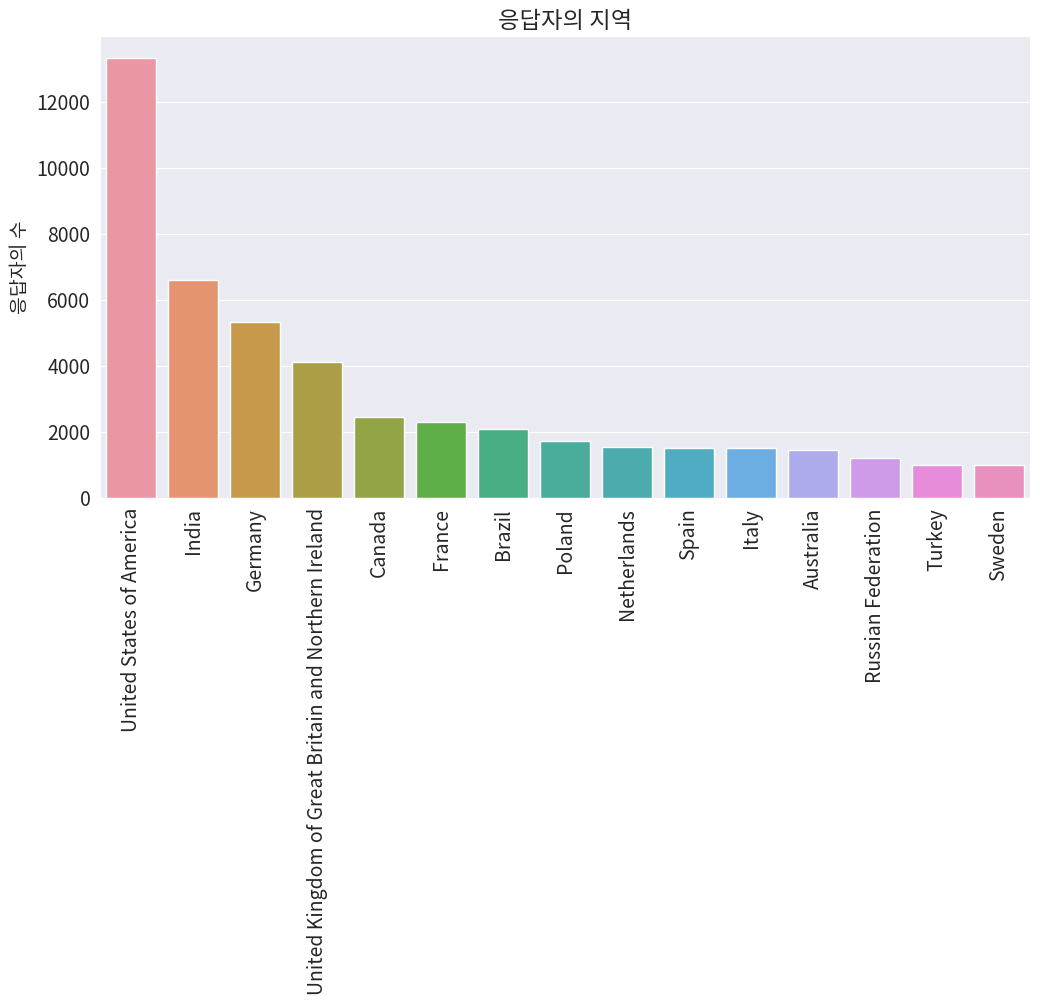

In [146]:
country_name = survey_df["Country"].value_counts().head(15).index
survey_country = survey_df["Country"].value_counts().head(15)

plt.figure(figsize=(12, 6)) # figure 사이즈를 12 x 6으로 설정합니다.
sns.barplot(x=country_name, y=survey_country)
plt.xticks(rotation = 90)
plt.title("응답자의 지역")
plt.ylabel("응답자의 수")
plt.show()

이 설문 조사는 영어권 국가의 응답자 비율이 높다. 즉 비영어권 국가의 글로벌 프로그래밍 커뮤니티를 대표하지 않을 수 있다.

이 설문에서 조사하는 연령에 대한 데이터의 특징이 어떤지 살펴보자

In [147]:
schema_raw["Age"]

'What is your age?'

In [148]:
count_nan(survey_df['Age'])

3011

In [149]:
age_counts = survey_df["Age"].value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [150]:
survey_df["Age"].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [151]:
survey_df["Age"].nunique()

8

연습 문제: 연령의 분포가 한눈에 들어오도록 아래와 같이 그래프를 출력해보세요.

x축에 출력하는 데이터의 순서도 고려하여 작성해야 합니다.

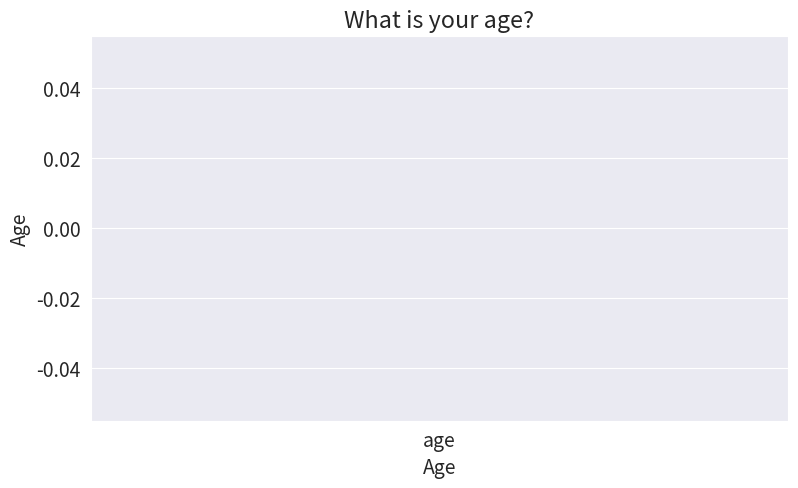

In [163]:
sns.barplot(x=survey_df["Age"], y=survey_df["Age"].value_counts(), order=["age"])

plt.title(schema_raw["Age"])
plt.show()

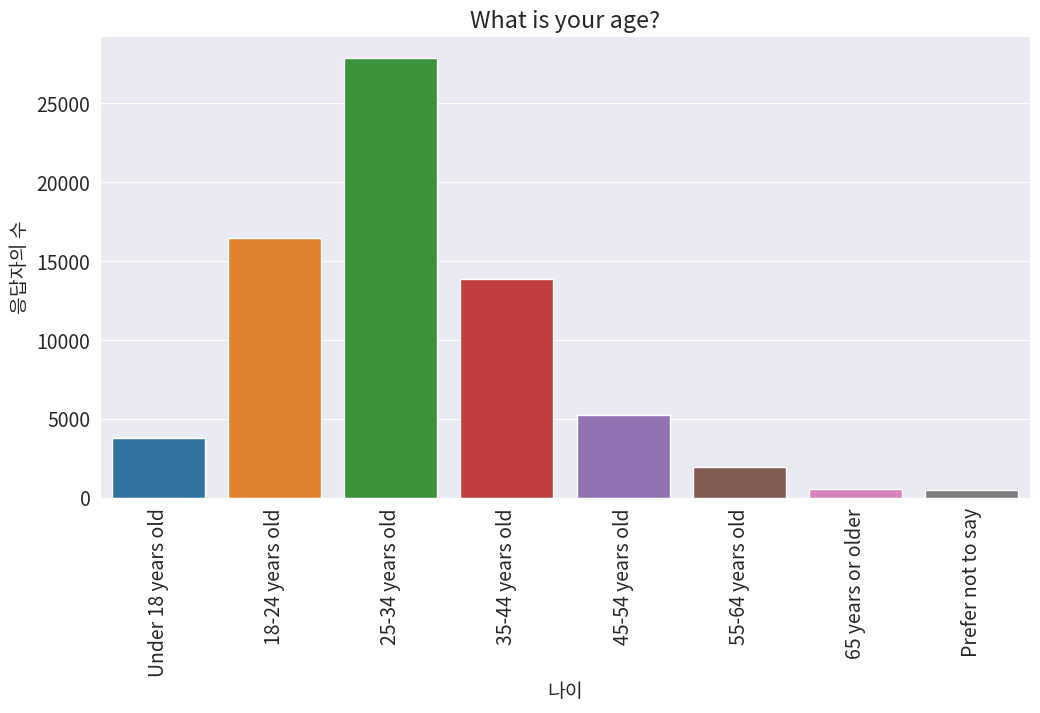

In [186]:
country_name = survey_df["Age"].value_counts().index
survey_country = survey_df["Age"].value_counts()
age_order = ["Under 18 years old",
             "18-24 years old",
             "25-34 years old",
             "35-44 years old",
             "45-54 years old",
             "55-64 years old",
             "65 years or older",
             "Prefer not to say"]

plt.figure(figsize=(12, 6)) # figure 사이즈를 12 x 6으로 설정합니다.
sns.countplot(data=survey_df, x="Age", order=age_order)
plt.xticks(rotation = 90)
plt.title(schema_raw["Age"])
plt.xlabel("나이")
plt.ylabel("응답자의 수")
plt.show()

연습 문제: 앞의 데이터를 활용하여 아래와 같이 파이 플롯을 작성해보세요.

In [192]:
survey_df["Gender"].value_counts().head()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [204]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


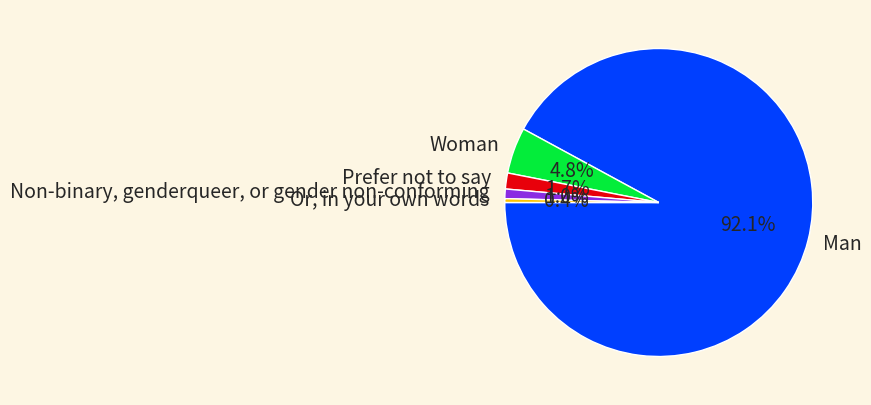

In [213]:
labels = ['Man', 'Woman', 'Prefer not to say',
          'Non-binary, genderqueer, or gender non-conforming', 'Or, in your own words']

plt.pie(survey_df.Gender.value_counts().head(5), labels = labels,
        autopct = '%1.1f%%', startangle=180)
plt.style.use('seaborn-bright')
# plt.style.use("default") 로 변경해줘야 함
# mpl.rcParams["axes.facecolor"] = "white"
plt.show()

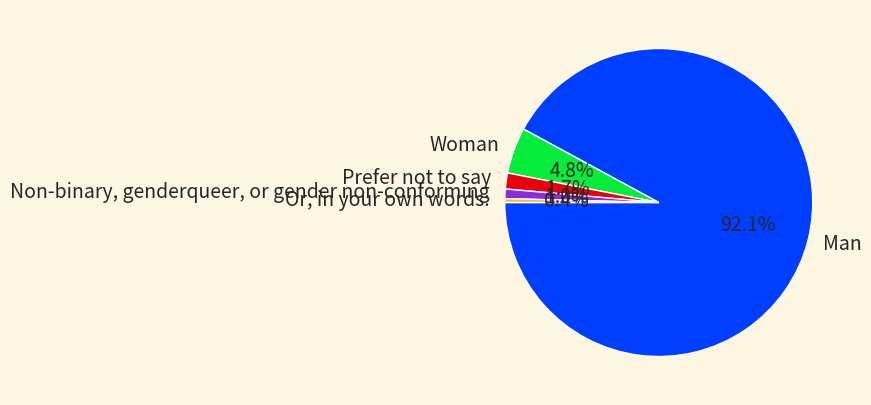

In [219]:
gender_counts = survey_df.Gender.value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)
plt.show()

In [220]:
schema_raw["EdLevel"]

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [221]:
survey_df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

연습 문제: 아래 보이는 그래프를 출력하라

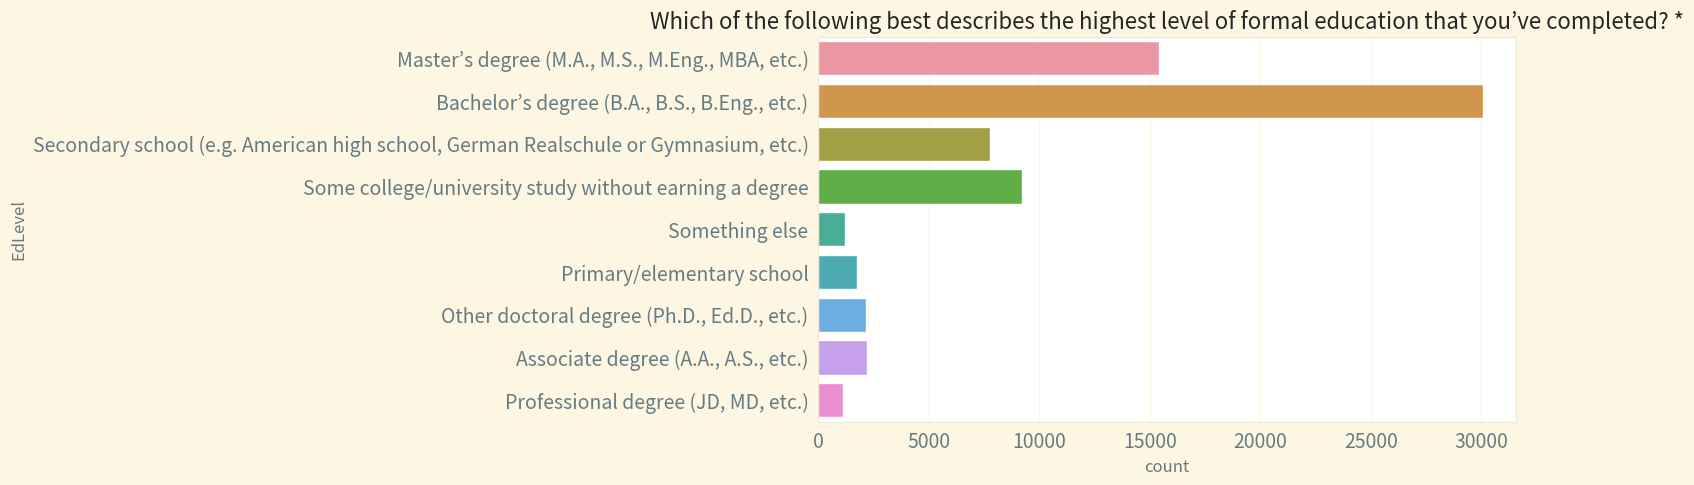

In [228]:
sns.countplot(data=survey_df, y="EdLevel")
plt.title(schema_raw["EdLevel"])
plt.show()